### Threat Detection | Binary Classification | 9.3.2024

In [1]:
import pandas as pd
import os
import glob


### Data Preparation for Binary Classification (Benign Data)
- Create benign_traffic dataframe and populate with benign PCAP data
- Create attack_traffic dataframe and populate with attack data from seven attack classes CSV
- Remove statistical features to isolate raw features in network traffic for analysis ['Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'Variance']
- Create combined_data object concatonating benign_traffic and attack_traffic dataframe
- Create target variable indicating whether the traffic is benign or attack

### Statistical Summaries & Class Distribution
- compare distributions of features between benign and attack traffic datasets.
- 

#### Data Preprocessing for Benign Traffic

In [1]:
import pandas as pd
import os
import glob
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Path to the directory containing all benign traffic CSV files
benign_dir = '/home/jbenyam/threatdetection/dataset/csv/Benign_Final/'

# Initialize an empty DataFrame to store the combined benign traffic data
combined_benign_traffic = pd.DataFrame()

# Track the number of batches processed
batch_number = 0

# List of statistical features to remove
statistical_features = ['Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'Variance']

# Process the benign traffic files in chunks
for file_path in glob.glob(os.path.join(benign_dir, '*.csv')):
    for chunk in pd.read_csv(file_path, chunksize=10000):  # Adjust chunksize based on memory availability
        # Remove statistical features
        chunk = chunk.drop(columns=[col for col in chunk.columns if any(stat in col for stat in statistical_features)])
        # Add label for benign traffic
        chunk['label'] = 0
        # Concatenate to the combined DataFrame
        combined_benign_traffic = pd.concat([combined_benign_traffic, chunk], axis=0, ignore_index=True)
        batch_number += 1
        logging.info(f'Processed {batch_number} benign traffic batches.')

# Save the combined benign traffic data to a CSV file
output_path = '/home/jbenyam/threatdetection/dataset/csv/combined_benign_traffic_raw.csv'
combined_benign_traffic.to_csv(output_path, index=False)

logging.info(f'Saved the combined benign traffic data to {output_path}.')


2024-09-03 18:18:52,642 - INFO - Processed 1 benign traffic batches.
2024-09-03 18:18:52,659 - INFO - Processed 2 benign traffic batches.
2024-09-03 18:18:52,674 - INFO - Processed 3 benign traffic batches.
2024-09-03 18:18:52,689 - INFO - Processed 4 benign traffic batches.
2024-09-03 18:18:52,705 - INFO - Processed 5 benign traffic batches.
2024-09-03 18:18:52,720 - INFO - Processed 6 benign traffic batches.
2024-09-03 18:18:52,735 - INFO - Processed 7 benign traffic batches.
2024-09-03 18:18:52,751 - INFO - Processed 8 benign traffic batches.
2024-09-03 18:18:52,769 - INFO - Processed 9 benign traffic batches.
2024-09-03 18:18:52,785 - INFO - Processed 10 benign traffic batches.
2024-09-03 18:18:52,804 - INFO - Processed 11 benign traffic batches.
2024-09-03 18:18:52,824 - INFO - Processed 12 benign traffic batches.
2024-09-03 18:18:52,842 - INFO - Processed 13 benign traffic batches.
2024-09-03 18:18:52,863 - INFO - Processed 14 benign traffic batches.
2024-09-03 18:18:52,881 - INF

#### Data Preprocessing for Attack Traffic

In [2]:
import pandas as pd
import os
import glob
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Path to the directory containing all attack traffic CSV files
all_csv_dir = '/home/jbenyam/threatdetection/dataset/csv/'

# Path to the directory containing benign traffic files that should be excluded
exclude_dir = '/home/jbenyam/threatdetection/dataset/csv/Benign_Final/'

# Initialize an empty DataFrame to store the combined attack traffic data
combined_attack_traffic = pd.DataFrame()

# Track the number of files and batches processed
file_number = 0
batch_number = 0

# List of statistical features to remove
statistical_features = ['Tot sum', 'Min', 'Max', 'AVG', 'Std', 'Tot size', 'Variance']

# Process the attack traffic files in chunks
for file_path in glob.glob(os.path.join(all_csv_dir, '**/*.csv'), recursive=True):
    if not file_path.startswith(exclude_dir):
        file_number += 1
        # Sample 4 random batches from each file
        for chunk in pd.read_csv(file_path, chunksize=10000):  # Adjust chunksize based on memory availability
            # Randomly select 4 batches
            if batch_number < 4:
                # Remove statistical features
                chunk = chunk.drop(columns=[col for col in chunk.columns if any(stat in col for stat in statistical_features)])
                # Add label for attack traffic
                chunk['label'] = 1
                # Concatenate to the combined DataFrame
                combined_attack_traffic = pd.concat([combined_attack_traffic, chunk], axis=0, ignore_index=True)
                batch_number += 1
                logging.info(f'Processed batch {batch_number} from file {file_number}.')
            else:
                break
        # Reset batch number for each file
        batch_number = 0

# Save the combined attack traffic data to a CSV file
output_path = '/home/jbenyam/threatdetection/dataset/csv/combined_attack_traffic_raw.csv'
combined_attack_traffic.to_csv(output_path, index=False)

logging.info(f'Saved the combined attack traffic data to {output_path}.')


2024-09-03 18:27:10,161 - INFO - Processed batch 1 from file 1.
2024-09-03 18:27:10,174 - INFO - Processed batch 2 from file 1.
2024-09-03 18:27:10,186 - INFO - Processed batch 3 from file 1.
2024-09-03 18:27:10,196 - INFO - Processed batch 4 from file 1.
2024-09-03 18:27:10,221 - INFO - Processed batch 1 from file 2.
2024-09-03 18:27:10,235 - INFO - Processed batch 2 from file 2.
2024-09-03 18:27:10,249 - INFO - Processed batch 3 from file 2.
2024-09-03 18:27:10,257 - INFO - Processed batch 4 from file 2.
2024-09-03 18:27:10,272 - INFO - Processed batch 1 from file 3.
2024-09-03 18:27:10,287 - INFO - Processed batch 2 from file 3.
2024-09-03 18:27:10,302 - INFO - Processed batch 3 from file 3.
2024-09-03 18:27:10,310 - INFO - Processed batch 4 from file 3.
2024-09-03 18:27:10,327 - INFO - Processed batch 1 from file 4.
2024-09-03 18:27:10,343 - INFO - Processed batch 2 from file 4.
2024-09-03 18:27:10,360 - INFO - Processed batch 3 from file 4.
2024-09-03 18:27:10,369 - INFO - Process

### Data Pre-Processing | Combining attack_traffic_raw and benign_traffic_raw

In [1]:
import pandas as pd
import os
import logging

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Paths to the previously saved CSV files
benign_csv_path = '/home/jbenyam/threatdetection/dataset/csv/combined_benign_traffic_raw.csv'
attack_csv_path = '/home/jbenyam/threatdetection/dataset/csv/combined_attack_traffic_raw.csv'

# Initialize an empty list to store processed data in chunks
output_path = '/home/jbenyam/threatdetection/dataset/csv/sampled_traffic_raw.csv'

# Create an iterator for batching
chunksize = 5000  # Adjust based on memory capacity

# Process benign traffic in chunks
for i, chunk in enumerate(pd.read_csv(benign_csv_path, chunksize=chunksize)):
    # Label the benign traffic
    chunk['label'] = 0
    # Save the first chunk, overwrite the file, append the rest
    if i == 0:
        chunk.to_csv(output_path, mode='w', header=True, index=False)
    else:
        chunk.to_csv(output_path, mode='a', header=False, index=False)
    logging.info(f'Processed benign chunk {i + 1}')

# Process attack traffic in chunks
for i, chunk in enumerate(pd.read_csv(attack_csv_path, chunksize=chunksize)):
    # Label the attack traffic
    chunk['label'] = 1
    # Append the chunk to the file
    chunk.to_csv(output_path, mode='a', header=False, index=False)
    logging.info(f'Processed attack chunk {i + 1}')

# Load and shuffle the combined dataset in chunks
# This can be memory-intensive; ensure shuffling is handled chunk-wise or external shuffling is performed if needed
combined_data = pd.read_csv(output_path, chunksize=chunksize)
shuffled_output_path = '/home/jbenyam/threatdetection/dataset/csv/sampled_traffic_raw_shuffled.csv'

# Shuffle each chunk and save to the new file
for i, chunk in enumerate(combined_data):
    shuffled_chunk = chunk.sample(frac=1, random_state=42).reset_index(drop=True)
    if i == 0:
        shuffled_chunk.to_csv(shuffled_output_path, mode='w', header=True, index=False)
    else:
        shuffled_chunk.to_csv(shuffled_output_path, mode='a', header=False, index=False)
    logging.info(f'Shuffled and saved chunk {i + 1}')

logging.info(f'Saved the shuffled combined traffic data to {shuffled_output_path}.')


2024-09-05 08:11:04,206 - INFO - Processed benign chunk 1
2024-09-05 08:11:04,240 - INFO - Processed benign chunk 2
2024-09-05 08:11:04,270 - INFO - Processed benign chunk 3
2024-09-05 08:11:04,303 - INFO - Processed benign chunk 4
2024-09-05 08:11:04,330 - INFO - Processed benign chunk 5
2024-09-05 08:11:04,359 - INFO - Processed benign chunk 6
2024-09-05 08:11:04,387 - INFO - Processed benign chunk 7
2024-09-05 08:11:04,416 - INFO - Processed benign chunk 8
2024-09-05 08:11:04,450 - INFO - Processed benign chunk 9
2024-09-05 08:11:04,478 - INFO - Processed benign chunk 10
2024-09-05 08:11:04,507 - INFO - Processed benign chunk 11
2024-09-05 08:11:04,535 - INFO - Processed benign chunk 12
2024-09-05 08:11:04,563 - INFO - Processed benign chunk 13
2024-09-05 08:11:04,592 - INFO - Processed benign chunk 14
2024-09-05 08:11:04,621 - INFO - Processed benign chunk 15
2024-09-05 08:11:04,648 - INFO - Processed benign chunk 16
2024-09-05 08:11:04,678 - INFO - Processed benign chunk 17
2024-0

##### Verify the number of records in combined_attack_traffic_raw .csv and combined_benign_traffic_raw.csv

In [3]:
import pandas as pd

# Paths to the previously saved CSV files
benign_csv_path = '/home/jbenyam/threatdetection/dataset/csv/combined_benign_traffic_raw.csv'
attack_csv_path = '/home/jbenyam/threatdetection/dataset/csv/combined_attack_traffic_raw.csv'

# Initialize record counters
benign_record_count = 0
attack_record_count = 0

# Count the number of records in the benign file
for chunk in pd.read_csv(benign_csv_path, chunksize=10000):
    benign_record_count += len(chunk)

# Count the number of records in the attack file
for chunk in pd.read_csv(attack_csv_path, chunksize=10000):
    attack_record_count += len(chunk)

print(f"Number of benign records: {benign_record_count}")
print(f"Number of attack records: {attack_record_count}")


Number of benign records: 1098191
Number of attack records: 10102674


##### Verify the number of records categorized as attack and benign in the sampled_traffic_raw_shuffled.csv and sampled_traffic_raw.csv

In [4]:
import pandas as pd

# Paths to the CSV files
shuffled_csv_path = '/home/jbenyam/threatdetection/dataset/csv/sampled_traffic_raw_shuffled.csv'
non_shuffled_csv_path = '/home/jbenyam/threatdetection/dataset/csv/sampled_traffic_raw.csv'

# Initialize counters for attack and benign labels
shuffled_attack_count = 0
shuffled_benign_count = 0
non_shuffled_attack_count = 0
non_shuffled_benign_count = 0

# Count the number of attack and benign records in the shuffled dataset
for chunk in pd.read_csv(shuffled_csv_path, chunksize=5000):
    shuffled_attack_count += (chunk['label'] == 1).sum()
    shuffled_benign_count += (chunk['label'] == 0).sum()

# Count the number of attack and benign records in the non-shuffled dataset
for chunk in pd.read_csv(non_shuffled_csv_path, chunksize=10000):
    non_shuffled_attack_count += (chunk['label'] == 1).sum()
    non_shuffled_benign_count += (chunk['label'] == 0).sum()

# Print the results
print(f"Shuffled dataset - Attack records: {shuffled_attack_count}, Benign records: {shuffled_benign_count}")
print(f"Non-shuffled dataset - Attack records: {non_shuffled_attack_count}, Benign records: {non_shuffled_benign_count}")


Shuffled dataset - Attack records: 10102674, Benign records: 1098191
Non-shuffled dataset - Attack records: 10102674, Benign records: 1098191


### Data Pre-Processing | Statistical Analysis on Class Distribution

In [6]:
#Print Class Distrubtion of the dataset | Benign=0, Attack=1
print(class_distribution)
print(sampled_data.head())
print(sampled_data.tail())
print(sampled_data.info())


label
1    10102674
0     1098191
Name: count, dtype: int64
   Header_Length  Protocol Type  Time_To_Live       Rate  fin_flag_number  \
0           29.6              6         114.1  68.738911              0.0   
1           24.8              6         149.1  47.628610              0.0   
2           17.6              6         156.1  35.455709              0.0   
3           24.8              6          91.1  68.694442              0.0   
4           24.0              6         180.9  97.070372              0.0   

   syn_flag_number  rst_flag_number  psh_flag_number  ack_flag_number  \
0              0.0              0.0              0.1              0.9   
1              0.0              0.0              0.2              0.7   
2              0.0              0.0              0.3              0.6   
3              0.0              0.0              0.1              0.7   
4              0.0              0.0              0.0              0.7   

   ece_flag_number  ...  UDP  DHCP  AR

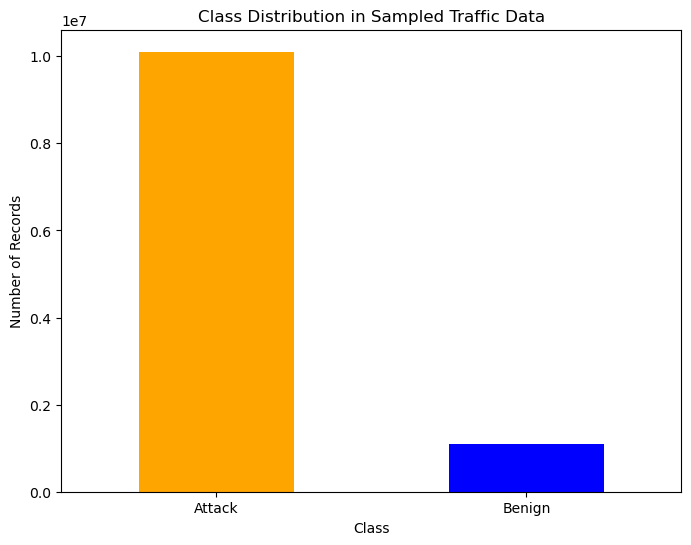

(label
 1    10102674
 0     1098191
 Name: count, dtype: int64,
        Header_Length  Protocol Type  Time_To_Live          Rate  \
 count   1.120086e+07   1.120086e+07  1.120086e+07  1.120086e+07   
 mean    1.277805e+01   1.343858e+01  7.078279e+01           inf   
 std     1.012956e+01   1.404801e+01  2.435890e+01           NaN   
 min     0.000000e+00   0.000000e+00  0.000000e+00  1.375466e-05   
 25%     1.120000e+00   6.000000e+00  6.400000e+01  3.103673e+03   
 50%     8.480000e+00   6.000000e+00  6.400000e+01  1.247488e+04   
 75%     2.000000e+01   1.700000e+01  6.463000e+01  3.060866e+04   
 max     6.000000e+01   4.700000e+01  2.550000e+02           inf   
 
        fin_flag_number  syn_flag_number  rst_flag_number  psh_flag_number  \
 count     1.120086e+07     1.120086e+07     1.120086e+07     1.120086e+07   
 mean      5.940946e-02     1.411349e-01     6.455556e-02     8.039000e-02   
 std       2.314276e-01     3.393251e-01     2.376362e-01     2.354493e-01   
 min     

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the shuffled combined dataset
data_path = '/home/jbenyam/threatdetection/dataset/csv/sampled_traffic_raw.csv'
sampled_data = pd.read_csv(data_path)

# Calculate class distribution
class_distribution = sampled_data['label'].value_counts()

# Plot class distribution
plt.figure(figsize=(8, 6))
class_distribution.plot(kind='bar', color=['orange', 'blue'])
plt.title('Class Distribution in Sampled Traffic Data')
plt.xlabel('Class')
plt.ylabel('Number of Records')
plt.xticks(ticks=[0, 1], labels=['Attack', 'Benign'], rotation=0)
plt.show()

# Additional summary statistics
summary_stats = sampled_data.describe(include='all')

# Display class distribution and summary statistics
class_distribution, summary_stats


### Data Preparation | Understanding Infinite Values and NaN values

In [12]:
## Generate visualizations comparing values of attack and benign record for all features.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the dataset is already loaded in 'sampled_data'
# 'label' column contains 0 for benign and 1 for attack

# Separate attack and benign records for comparison
benign_data = sampled_data[sampled_data['label'] == 0]
attack_data = sampled_data[sampled_data['label'] == 1]

# Drop the 'label' column as we are comparing features
features = sampled_data.drop('label', axis=1).columns

# Set up the plot size
plt.figure(figsize=(15, 20))

# Iterate over each feature and plot the comparison
for i, feature in enumerate(features, 1):
    plt.subplot(len(features) // 3 + 1, 3, i)
    
    sns.boxplot(x='label', y=feature, data=sampled_data, palette="Set2")
    plt.title(f'{feature} Comparison: Benign vs Attack')
    plt.xticks([0, 1], ['Benign', 'Attack'])

plt.tight_layout()
plt.show()

## Histographs for Each Feature


2024-09-05 11:31:34,157 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/tmp/ipykernel_379298/1387078472.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y=feature, data=sampled_data, palette="Set2")
2024-09-05 11:31:37,136 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-09-05 11:31:43,125 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
/tmp/ipykernel_379298/1387078472.py:2

: 

In [3]:
import numpy as np

# Calculate the number of records with infinite values
num_records_with_infinite = np.isinf(X).sum()

# Calculate the number of records with NaN values
num_records_with_nan = np.isnan(X).sum()

# Print the number of records with infinite and NaN values
print(f"Number of records with infinite values: {num_records_with_infinite}")
print(f"Number of records with NaN values: {num_records_with_nan}")


Number of records with infinite values: Header_Length        0
Protocol Type        0
Time_To_Live         0
Rate               432
fin_flag_number      0
syn_flag_number      0
rst_flag_number      0
psh_flag_number      0
ack_flag_number      0
ece_flag_number      0
cwr_flag_number      0
ack_count            0
syn_count            0
fin_count            0
rst_count            0
HTTP                 0
HTTPS                0
DNS                  0
Telnet               0
SMTP                 0
SSH                  0
IRC                  0
TCP                  0
UDP                  0
DHCP                 0
ARP                  0
ICMP                 0
IGMP                 0
IPv                  0
LLC                  0
IAT                  0
Number               0
dtype: int64
Number of records with NaN values: Header_Length      0
Protocol Type      0
Time_To_Live       0
Rate               0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag

In [10]:
# Calculate the total number of infinite rate records
total_records = num_records_with_infinite['Rate']

# Calculate the number of benign records with infinite rate
benign_records = sampled_data[(sampled_data['label'] == 0) & (sampled_data['Rate'] == np.inf)]['Rate'].count()

# Calculate the number of attack records with infinite rate
attack_records = sampled_data[(sampled_data['label'] == 1) & (sampled_data['Rate'] == np.inf)]['Rate'].count()

# Calculate the percentages
benign_percentage = (benign_records / total_records) * 100
attack_percentage = (attack_records / total_records) * 100

# Print the percentages
print(f"Percentage of benign records with infinite rate: {benign_percentage:.2f}%")
print(f"Percentage of attack records with infinite rate: {attack_percentage:.2f}%")

# Calculate the average value for the rate feature of benign records
benign_rate_avg = benign_data[benign_data['Rate'] != np.inf]['Rate'].mean()

# Calculate the average value for the rate feature of attack records
attack_rate_avg = sampled_data[(sampled_data['label'] == 1) & (sampled_data['Rate'] != np.inf)]['Rate'].mean()

# Print the average values
print(f"Average rate for benign records: {benign_rate_avg:.2f}")
print(f"Average rate for attack records: {attack_rate_avg:.2f}")

# Calculate the number of records with infinite 'Rate' values
num_records_with_infinite = len(sampled_data[sampled_data['Rate'] == np.inf])

# Calculate the percentage of records with infinite 'Rate' values
percentage_inf_rate = (num_records_with_infinite / len(sampled_data)) * 100

# Print the percentage
print(f"Percentage of records with infinite rate: {percentage_inf_rate:.2f}%")



Percentage of benign records with infinite rate: 15.05%
Percentage of attack records with infinite rate: 84.95%
Average rate for benign records: 2890.10
Average rate for attack records: 22441.62
Percentage of records with infinite rate: 0.00%


### Train/Test Split & Decision Tree Classification Model Training
##### Bagging Classifier Needed due to 10:1 class imbalance

In [1]:
import logging
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt

# Load the shuffled combined dataset
data_path = '/home/jbenyam/threatdetection/dataset/csv/sampled_traffic_raw.csv'
sampled_data = pd.read_csv(data_path)

# Filter benign traffic data for balanced sampling in max_samples hyperparameter
benign_data = sampled_data[sampled_data['label'] == 0]

# Set up logging for verbose output
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

##################################################################################################################################################################################################################################
######################## Model Training | Bagging Classifier w. Decision Trees ###################################################################################################################################################
############################### Binary Classification ##################################################################################################################################################################
##################################################################################################################################################################################################################################

# Separate features and labels
X = sampled_data.drop('label', axis=1)
y = sampled_data['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Log the start of model training
logging.info("Starting model training...")

# Initialize a Bagging classifier with decision trees as base models | Adjusted weights to reflect 10:1 class imbalance
model = BaggingClassifier(
    estimator=DecisionTreeClassifier(class_weight={0: 10, 1: 1}),  # Class weights
    n_estimators=10,  # Number of base models
    max_samples=min(len(benign_data) * 3, len(X_train)),  # Use balanced subsets in each base model | Cap the number of samples to avoid memory issues
    n_jobs=-1,  # Use all available CPU cores for parallel processing
    verbose=1,  # Verbose output for monitoring
    random_state=42
)

# Log the completion of model initialization
logging.info("Model initialized with 10 base estimators.")

# Train the model
model.fit(X_train, y_train)

# Log model training completion
logging.info("Model training completed.")

##################################################################################################################################################################################################################################
######################## Baseline Model Evaluation ########################################################################################################################################################################################
##################################################################################################################################################################################################################################

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability estimates for the positive class

# Confusion Matrix
logging.info("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Classification Report (Precision, Recall, F1-Score)
logging.info("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
logging.info(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure() # ensure figures don't overlap
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Log ROC-AUC completion
logging.info("ROC Curve generated.")

##################################################################################################################################################################################################################################
######################## Saving Baseline Model - Joblib   ########################################################################################################################################################################
##################################################################################################################################################################################################################################

# Path to save the model
model_save_path = '/home/jbenyam/threatdetection/models/baseline_model.joblib'

bc_baseline_model = model # Rename the model after subsequent trainings for clarity

# Save the trained model
joblib.dump(bc_baseline_model, model_save_path)

print(f"Model saved to {model_save_path}")


: 

#### Model Explanation: Predict Attack vs. Benign Traffic
##### Input: Series of numberic values representing the 32 features in a PCAP record.
##### Output: Based on the user-input of numeric values from PCAP records, the model predicts either ATTACK or BENIGN traffic, issues propability of input packet belonging to "attack" class.
- Attack Categories: BrowserHijacking, CommandInjection, DDoS-ACK_Fragmentation, DDoS-HTTP_Flood, DDoS-ICMP_Flood, DDoS-ICMP_Fragmentation, DDoS-PSHACK_Flood, DDoS-RSTFINFLOOD, DDoS-RST DDoS

### Model Expirementation | XG Boost
- Model: XGBClassifier
- Type: Tree-based Model

In [2]:
##################################################################################################################################################################################################################################
## Data Preprocessing | Handling Infinite Values
##################################################################################################################################################################################################################################
import pandas as pd
import numpy as np

# Load the shuffled combined dataset
data_path = '/home/jbenyam/threatdetection/dataset/csv/sampled_traffic_raw.csv'
sampled_data = pd.read_csv(data_path)

## Create a new binary feature to indicate whether the 'Rate' was infinite
sampled_data['Rate_is_infinite'] = sampled_data['Rate'] == np.inf

# Replace infinite values with a large constant (e.g., maximum finite value in the dataset or an arbitrary large value)
max_finite_rate = sampled_data[sampled_data['Rate'] != np.inf]['Rate'].max()
sampled_data['Rate'].replace(np.inf, max_finite_rate * 10000, inplace=True)


/tmp/ipykernel_392079/1984715083.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sampled_data['Rate'].replace(np.inf, max_finite_rate * 10000, inplace=True)


2024-09-05 11:40:00,745 - INFO - Starting model training with XGBoost (GPU)...
2024-09-05 11:40:00,746 - INFO - Model initialized with GPU support.


[11:40:02] ======== Monitor (0): HostSketchContainer ========
[11:40:02] AllReduce: 0.013054s, 1 calls @ 13054us

[11:40:02] MakeCuts: 0.015146s, 1 calls @ 15146us

[11:40:02] DEBUG: /home/conda/feedstock_root/build_artifacts/xgboost-split_1722516643542/work/src/gbm/gbtree.cc:130: Using tree method: 5
[11:40:02] DEBUG: /home/conda/feedstock_root/build_artifacts/xgboost-split_1722516643542/work/src/tree/updater_gpu_hist.cu:822: [GPU Hist]: Configure


/home/jbenyam/conda-init/envs/rapids_env/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:40:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1722516643542/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


[11:40:02] ======== Monitor (0):  ========
[11:40:02] InitCompressedData: 0.016051s, 1 calls @ 16051us



2024-09-05 11:40:04,405 - INFO - Model training completed.


[11:40:04] ======== Monitor (0): Learner ========
[11:40:04] Configure: 0.021205s, 1 calls @ 21205us

[11:40:04] EvalOneIter: 0.000575s, 100 calls @ 575us

[11:40:04] GetGradient: 0.023274s, 100 calls @ 23274us

[11:40:04] PredictRaw: 0.002747s, 100 calls @ 2747us

[11:40:04] UpdateOneIter: 1.61058s, 100 calls @ 1610580us

[11:40:04] ======== Monitor (0): GBTree ========
[11:40:04] BoostNewTrees: 1.49905s, 100 calls @ 1499048us

[11:40:04] CommitModel: 5.6e-05s, 100 calls @ 56us

[11:40:04] ======== Device 0 Memory Allocations:  ========
[11:40:04] Peak memory usage: 975MiB
[11:40:04] Number of allocations: 4731
[11:40:04] ======== Monitor (0): updater_gpu_hist ========
[11:40:04] InitData: 0.001481s, 100 calls @ 1481us

[11:40:04] InitDataOnce: 0.001471s, 1 calls @ 1471us

[11:40:04] Update: 1.42249s, 100 calls @ 1422491us

[11:40:04] UpdatePredictionCache: 0.075852s, 100 calls @ 75852us

[11:40:04] ======== Monitor (0): gradient_based_sampler ========
[11:40:04] Sample: 0.091587s, 10

/home/jbenyam/conda-init/envs/rapids_env/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:40:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1722516643542/work/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/home/jbenyam/conda-init/envs/rapids_env/lib/python3.11/site-packages/xgboost/core.py:158: UserWarning: [11:40:04] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost-split_1722516643542/work/src/common/error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_pr

[[  55218  164467]
 [   4151 2016337]]


2024-09-05 11:40:06,574 - INFO - 
ROC-AUC Score: 0.9936


              precision    recall  f1-score   support

           0       0.93      0.25      0.40    219685
           1       0.92      1.00      0.96   2020488

    accuracy                           0.92   2240173
   macro avg       0.93      0.62      0.68   2240173
weighted avg       0.93      0.92      0.90   2240173



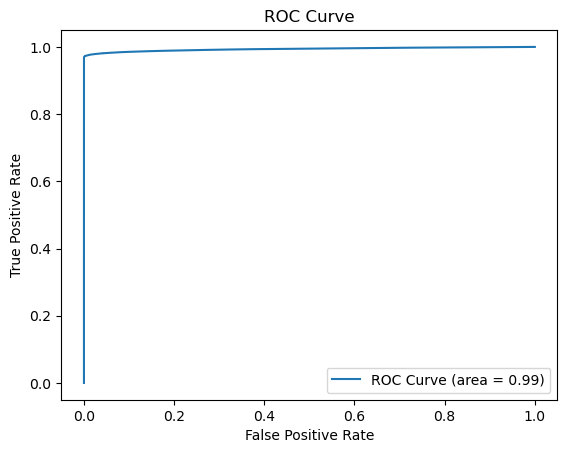

2024-09-05 11:40:06,729 - INFO - ROC Curve generated.


Model saved to /home/jbenyam/threatdetection/models/baseline_model.joblib


In [3]:
import logging
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import joblib



# Filter benign traffic data for balanced sampling in max_samples hyperparameter
benign_data = sampled_data[sampled_data['label'] == 0]


# Set up logging for verbose output
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

##################################################################################################################################################################################################################################
######################## Model Training | XGBoost with GPU #######################################################################################################################################################################
############################### Binary Classification ############################################################################################################################################################################
##################################################################################################################################################################################################################################

# Separate features and labels
X = sampled_data.drop('label', axis=1)
y = sampled_data['label']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Log the start of model training
logging.info("Starting model training with XGBoost (GPU)...")

# Initialize an XGBoost classifier with GPU support | Adjusted scale_pos_weight for 10:1 class imbalance
model = XGBClassifier(
    scale_pos_weight=10,  # Handle class imbalance (10:1 ratio)
    n_estimators=100,     # Number of boosting rounds
    max_depth=5,          # Control overfitting
    learning_rate=0.1,    # Step size shrinkage
    tree_method='hist',  # Use GPU for training
    device="cuda",        # Specify GPU device
    verbosity=3,          # Verbose output for monitoring
    random_state=42
)

# Log the completion of model initialization
logging.info("Model initialized with GPU support.")

# Train the model
model.fit(X_train, y_train)

# Log model training completion
logging.info("Model training completed.")

##################################################################################################################################################################################################################################
######################## Baseline Model Evaluation ########################################################################################################################################################################################
##################################################################################################################################################################################################################################

# Evaluate the model
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probability estimates for the positive class

# Confusion Matrix
logging.info("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Benign', 'Attack'], yticklabels=['Benign', 'Attack'])
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

# Classification Report (Precision, Recall, F1-Score)
logging.info("\nClassification Report:")
print(classification_report(y_test, y_pred))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba)
logging.info(f"\nROC-AUC Score: {roc_auc:.4f}")

# Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.2f})')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Log ROC-AUC completion
logging.info("ROC Curve generated.")

##################################################################################################################################################################################################################################
######################## Saving New Model - Joblib   ########################################################################################################################################################################
##################################################################################################################################################################################################################################

# Path to save the model
model_save_path = '/home/jbenyam/threatdetection/models/baseline_model.joblib'

bc_baseline_model = model # Rename the model after subsequent trainings for clarity

# Save the trained model
joblib.dump(bc_baseline_model, model_save_path)

print(f"Model saved to {model_save_path}")
